# Paired $t$-test

## Summary

First, test the hypothesis $H_{0} : \mu_{D} = 0, \> \mu_{D} > 0$, where $\mu_{D}$ is the underlying population mean difference between the heights of paired plants. (See description.)

Second, test the hypothesis $H_{0} : \mu_{X} = \mu_{S}, \> \mu_{X} > \mu_{S}$, where $\mu_{X}, \> \mu_{S}$ are the underlying population mean heights of the paired cross- and self-fertilised plants, respectivly. (See description.)

## Introduction

**description** : Heights of fifteen pairs of plants of the species *Zea mays*.
Each plant had parents grown from the same seed, where one plant in each pair was the offspring of a cross-fertilisation, the other of a self-fertilisation.

## Method

## Results

### Setup the notebook

In [1]:
# import the packages
from src import load
from scipy.stats import probplot, ttest_rel
from statsmodels.stats.weightstats import DescrStatsW
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set the Seaborn theme
sns.set_theme()

### Load the data

In [3]:
# import the data
darwin = load.darwin()

### Prepare the data

In [4]:
# declare local vars
x = darwin["Cross"]
s = darwin["Self"]
diff = x - s

### One-sample test of the difference

In [5]:
# one-sample test
one_sample = DescrStatsW(data=diff)

#### Visualise the data

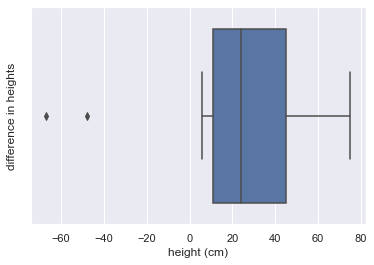

In [6]:
# plot as boxplot
ax = sns.boxplot(x=diff)
ax.set(xlabel="height (cm)", ylabel="difference in heights")
plt.show()

#### Check assumption of normality

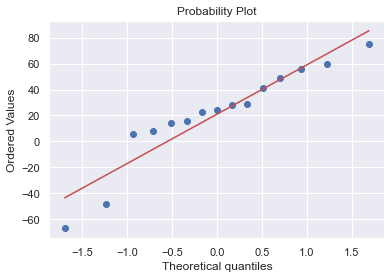

In [7]:
ax = plt.subplot()
probplot(x=diff, plot=ax)
plt.show()

#### Calculate the mean difference

In [8]:
one_sample.mean

20.933333333333334

#### Calculate the test statistic and the $p$-value

In [9]:
# perform test
tstat1, pval1, df1 = one_sample.ttest_mean(alternative="larger")

In [10]:
# get df
df1

14.0

In [11]:
# get t
tstat1

2.1479874613311205

In [12]:
# get p
pval1

0.024851472010900447

### Two-sample $t$-test of equal means

#### Visualise the data

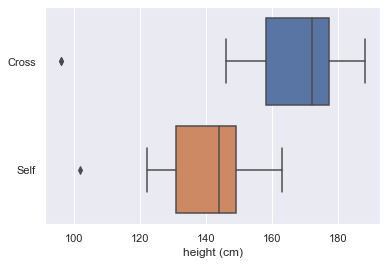

In [13]:
# plot as boxplots
ax = sns.boxplot(data=darwin.melt(), x="value", y="variable")
ax.set(xlabel="height (cm)", ylabel="")
plt.show()

#### Check assumption of normality

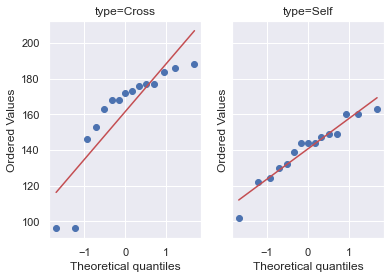

In [14]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
probplot(x=x, plot=ax1)
probplot(x=s, plot=ax2)
ax1.set(title="type=Cross")
ax2.set(title="type=Self")
plt.show()

#### Calculate the means

In [15]:
x.mean()

161.53333333333333

In [16]:
s.mean()

140.6

#### Calculate the test statistic and the $p$-value

In [17]:
# calcule df
x.size + s.size - 2

28

In [18]:
# perform test
tstat2, pval2 = ttest_rel(a=x, b=s, alternative="greater")

In [19]:
# get t
tstat2

2.1479874613311205

In [20]:
# get p
pval2

0.024851472010900447

## Discussion

Given both $p \in$ (0.01, 0.05], there is moderate to strong evidence against the null hypothesis.
We conclude that there is evidence to suggest that the mean difference in heights of the plants is greater than zero with cross-fertilised plants being taller on average than self-fertilised plants.